### Data Cleaning 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [116]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [118]:
dataset.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [119]:
null_percentage = (dataset.isnull().sum() / len(dataset)) * 100
null_percentage_dataset = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
filtered_columns = null_percentage_dataset[null_percentage_dataset['Null Percentage'] < 25]
selected_columns = filtered_columns['Column Name'].tolist()
filtered_dataset = dataset[selected_columns]
print(filtered_dataset.shape)
filtered_dataset.head()

(99, 10)


,Date received,Product,Sub-product,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [120]:
filtered_dataset = filtered_dataset.dropna(subset=["State", "ZIP code"])
filtered_dataset.head()

,Date received,Product,Sub-product,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
3,6/8/2014,Credit card,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
5,11/13/2013,Mortgage,Conventional adjustable mortgage (ARM),U.S. BANCORP,MN,48322,Phone,Closed with monetary relief,Yes,No
6,6/16/2015,Debt collection,Medical,California Accounts Service,CA,92111,Web,Closed with explanation,Yes,No


In [121]:
filtered_dataset["Sub-product"].fillna("Other mortgage", inplace = True)
filtered_dataset["Consumer disputed?"].fillna("Missed", inplace = True)

In [122]:
filtered_dataset['Date received'] = pd.to_datetime(filtered_dataset['Date received'])

In [123]:
filtered_dataset['Year'] = filtered_dataset['Date received'].dt.year
filtered_dataset['Month'] = filtered_dataset['Date received'].dt.month
filtered_dataset['Day'] = filtered_dataset['Date received'].dt.day

In [124]:
filtered_dataset.head()

,Date received,Product,Sub-product,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Day
0,2014-03-12,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No,2014,3,12
3,2014-06-08,Credit card,Other mortgage,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes,2014,6,8
4,2014-09-13,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes,2014,9,13
5,2013-11-13,Mortgage,Conventional adjustable mortgage (ARM),U.S. BANCORP,MN,48322,Phone,Closed with monetary relief,Yes,No,2013,11,13
6,2015-06-16,Debt collection,Medical,California Accounts Service,CA,92111,Web,Closed with explanation,Yes,No,2015,6,16


In [125]:
filtered_dataset["Sub-product"].fillna("Unknown", inplace=True)
filtered_dataset["Consumer disputed?"].fillna("Not specified", inplace=True)

In [126]:
filtered_dataset.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year                            0
Month                           0
Day                             0
dtype: int64

### Exploratory Data Analysis

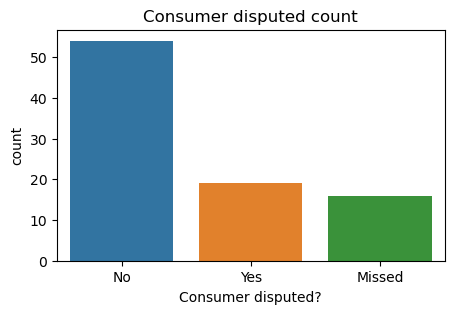

In [127]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=filtered_dataset, x='Consumer disputed?')
plt.title('Consumer disputed count')
plt.show()

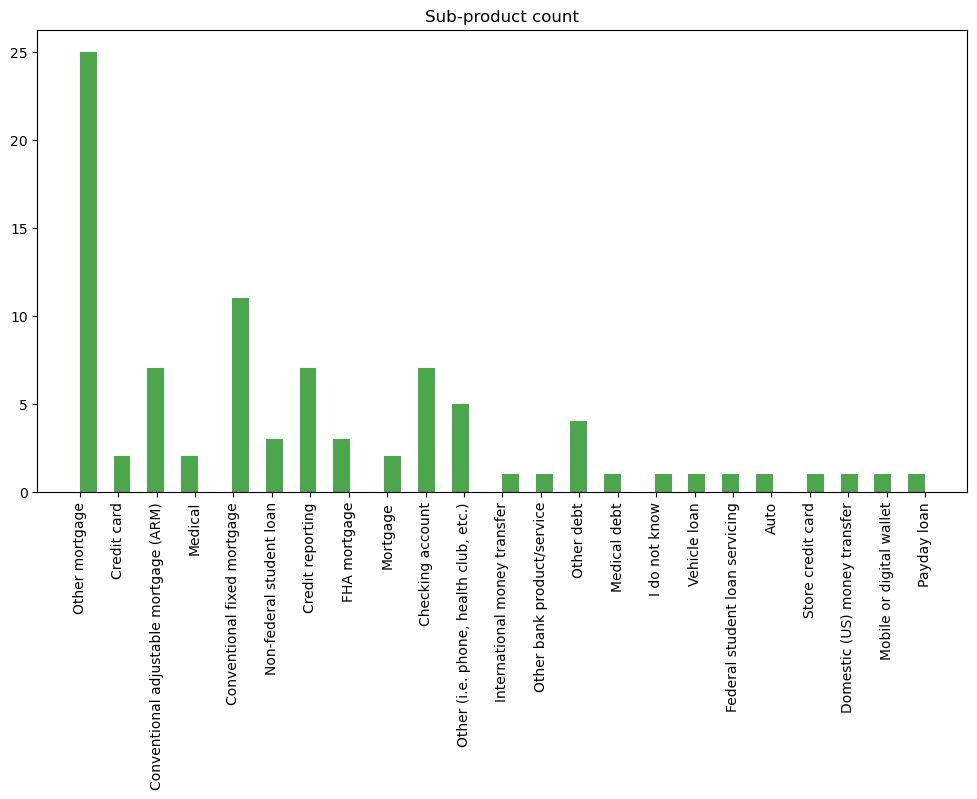

In [128]:
plt.figure(figsize=(12,6))
plt.hist(filtered_dataset['Sub-product'], bins=50, color='green', alpha=0.7)
plt.title("Sub-product count")
plt.xticks(rotation=90)
plt.show()

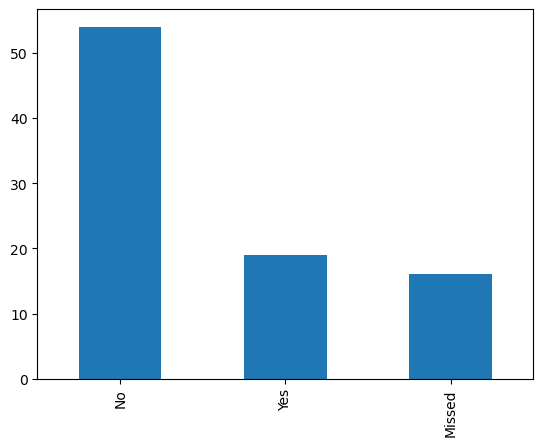

In [129]:
filtered_dataset["Consumer disputed?"].value_counts().plot(kind="bar")
plt.show()

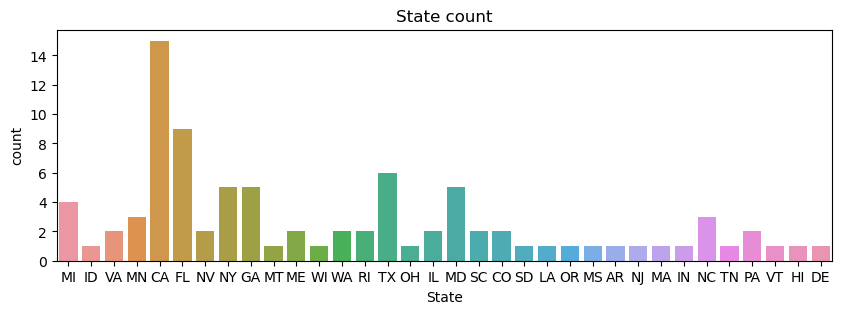

In [130]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.countplot(data=filtered_dataset, x='State')
plt.title('State count')
plt.show()

### Problems:

* Check customer dispute to know if the customers are statisfies with the service.
* Check which company has better or worst reviews it will help them to improve their servive
* Almost half of the complaints come from California
* Company should give option to cutomers to give their feedbacks
* We got most of the complaints in 2018 (company should check the problem to improve it)

In [133]:
from sklearn.preprocessing import LabelEncoder

for i in filtered_dataset.columns:
    filtered_dataset[i] = LabelEncoder().fit_transform(filtered_dataset[i])

In [135]:
x = filtered_dataset.drop(["Consumer disputed?"], axis=1)
y = filtered_dataset["Consumer disputed?"]

In [136]:
x.head()

,Date received,Product,Sub-product,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Year,Month,Day
0,19,9,19,23,14,44,3,0,0,2,2,10
3,22,2,19,2,7,66,4,0,0,2,5,6
4,27,6,4,12,30,14,4,0,0,2,8,11
5,14,9,2,46,15,43,1,1,0,1,10,11
6,43,6,11,14,1,73,4,0,0,3,5,14


In [137]:
# 0=no, 1=not specified, 2 = yes
y.unique()

array([1, 2, 0])

### Decision Tree

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(71, 12)
(71,)
(18, 12)
(18,)


In [139]:
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.85      0.85      0.85        13
           2       0.33      0.33      0.33         3

    accuracy                           0.78        18
   macro avg       0.73      0.73      0.73        18
weighted avg       0.78      0.78      0.78        18



In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.66666667 0.61111111 0.77777778 0.44444444 0.52941176]
Mean score: 0.6058823529411764


### KNN

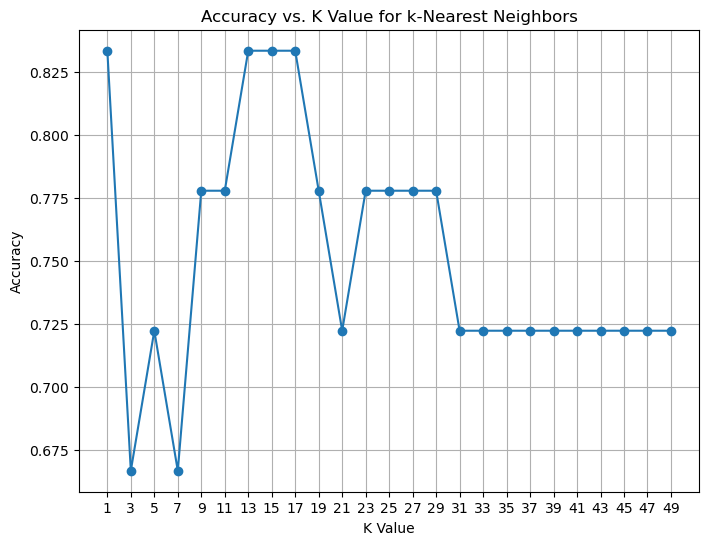

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [142]:
clf = KNeighborsClassifier(n_neighbors = 17, p = 1)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17, p=1)

In [143]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

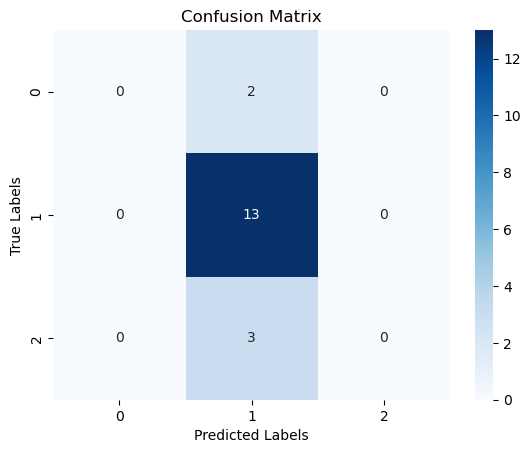

In [144]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [145]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      1.00      0.84        13
           2       0.00      0.00      0.00         3

    accuracy                           0.72        18
   macro avg       0.24      0.33      0.28        18
weighted avg       0.52      0.72      0.61        18



### SVM

In [146]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.75      0.69      0.72        13
           2       0.00      0.00      0.00         3

    accuracy                           0.61        18
   macro avg       0.38      0.56      0.43        18
weighted avg       0.59      0.61      0.58        18



In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.27777778 0.44444444 0.38888889 0.72222222 0.35294118]
Mean score: 0.43725490196078437
